**Importing necessary libraries and modules **


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# **What column to merge on?**

Chicago provides a list of taxicab owners and vehicles licensed to operate within the city, for public safety. Your goal is to merge two tables together. One table is called `taxi_owners`, with info about the taxi cab company owners, and one is called `taxi_veh`, with info about each taxi cab vehicle. Both the `taxi_owners` and `taxi_veh` tables have been loaded for you to explore.

Choose the column you would use to merge the two tables on using the
`.merge()` method.

- [ ] `on='rid'`
- [x] `on='vid'`
- [ ] `on='year'`
- [ ] `on='zip'`

# **Your first inner join**

You have been tasked with figuring out what the most popular types of fuel used in Chicago taxis are. To complete the analysis, you need to merge the `taxi_owners` and `taxi_veh` tables together on the vid column. You can then use the merged table along with the `.value_counts()` method to find the most common `fuel_type`.

Since you'll be working with `pandas` throughout the course, the package already loaded in the first cell for you as `pd` in each exercise in this course. The data reading lines for the `taxi_owners` and `taxi_veh` DataFrames from a pickle file are also provided in the first two lines on the following cell.

Instructions
* Read the taxi_ownders.p file and store it in DataFrame `taxi_owners` and the taxi_vehicles.p file and store it in DataFrame `taxi_veh`.
* Take a look at the columns of each DataFrame and decide which column to use for the inner merge.
* Merge the two DataFrames and store it intwo `taxi_owner_veh` DataFrame. Set the left and right table suffixes for overlapping columns of the merge to _own and _veh, respectively.
* Display the first rows from `taxi_owner_veh`.
* Select the `fuel_type` column from `taxi_owner_veh` and print the `value_counts()` to find the most popular `fuel_types` used.

In [ ]:
#Creating the DataFrames by reading from the files
taxi_owners = pd.read_pickle('https://github.com/datttrian/datacamp/blob/main/joining-data-with-pandas/taxi_owners.p?raw=True')
taxi_veh = pd.read_pickle('https://github.com/datttrian/datacamp/blob/main/joining-data-with-pandas/taxi_vehicles.p?raw=True')
#Looking at the DataFrames by printing the first rows using .head() function
print(taxi_owners.head())
print(taxi_veh.head())
#From the columns and first five values, it is clear that vid can be used to merge these two DataFrames
# Merge the taxi_owners and taxi_veh tables using 'vid' column
taxi_owner_veh = taxi_owners.merge(taxi_veh, on='vid')

#print the first rows of the taxi_owner_veh
print(taxi_owner_veh.head())

# Merge the taxi_owners and taxi_veh tables setting a suffix
taxi_own_veh = taxi_owners.merge(taxi_veh, on='vid', suffixes=('_own', '_veh'))


# Print the column names of taxi_own_veh
print(taxi_own_veh.columns)

# Print the value_counts to find the most popular fuel_type
print(taxi_own_veh['fuel_type'].value_counts())


     rid   vid           owner                 address    zip
0  T6285  6285  AGEAN TAXI LLC     4536 N. ELSTON AVE.  60630
1  T4862  4862    MANGIB CORP.  5717 N. WASHTENAW AVE.  60659
2  T1495  1495   FUNRIDE, INC.     3351 W. ADDISON ST.  60618
3  T4231  4231    ALQUSH CORP.   6611 N. CAMPBELL AVE.  60645
4  T5971  5971  EUNIFFORD INC.     3351 W. ADDISON ST.  60618
    vid    make   model  year fuel_type                owner
0  2767  TOYOTA   CAMRY  2013    HYBRID       SEYED M. BADRI
1  1411  TOYOTA    RAV4  2017    HYBRID          DESZY CORP.
2  6500  NISSAN  SENTRA  2019  GASOLINE       AGAPH CAB CORP
3  2746  TOYOTA   CAMRY  2013    HYBRID  MIDWEST CAB CO, INC
4  5922  TOYOTA   CAMRY  2013    HYBRID       SUMETTI CAB CO
     rid   vid         owner_x                 address    zip    make   model  \
0  T6285  6285  AGEAN TAXI LLC     4536 N. ELSTON AVE.  60630  NISSAN  ALTIMA   
1  T4862  4862    MANGIB CORP.  5717 N. WASHTENAW AVE.  60659   HONDA     CRV   
2  T1495  1495   FU

# **Inner joins and number of rows returned**

All of the merges you have studied to this point are called inner joins. It is necessary to understand that inner joins only return the rows with matching values in both tables. You will explore this further by reviewing the merge between the `wards` and `census` tables, then comparing it to merges of copies of these tables that are slightly altered, named `wards_altered`, and `census_altered`. The first row of the wards column has been changed in the altered tables. You will examine how this affects the merge between them.

The `wards`, `census`, `wards_altered` and `census_altered` DataFrames are loaded from the source pickle files in the first four lines of the following cell.

For this exercise, it is important to know that the `wards` and `census` tables start with 50 rows.

**Instructions**

* Merge `wards` and `census` on the `ward` column and save the result to `wards_census`.
* Merge the `wards_altered` and `census` tables on the `ward` column, and notice the difference in returned rows.
* Merge the `wards` and `census_altered` tables on the `ward` column, and notice the difference in returned rows.

In [ ]:
#Creating the DataFrames by reading from the files
wards = pd.read_pickle('https://github.com/datttrian/datacamp/blob/main/joining-data-with-pandas/ward.p?raw=True').astype(object)
census = pd.read_pickle('https://github.com/datttrian/datacamp/blob/main/joining-data-with-pandas/census.p?raw=True').astype(object)

wards_altered = pd.read_csv('https://github.com/datttrian/datacamp/blob/main/joining-data-with-pandas/wards_altered.csv?raw=True').astype(object)
census_altered = pd.read_csv('https://github.com/datttrian/datacamp/blob/main/joining-data-with-pandas/census_altered.csv?raw=True').astype(object)

#print(census.head())
import pandas as pd


# Merge wards and census on the 'ward' column
wards_census = wards.merge(census, on='ward')
print(f"Rows in wards_census: {len(wards_census)}")

# Merge wards_altered and census on the 'ward' column
wards_altered_census = wards_altered.merge(census, on='ward')
print(f"Rows in wards_altered_census: {len(wards_altered_census)}")

# Merge wards and census_altered on the 'ward' column
wards_census_altered = wards.merge(census_altered, on='ward')
print(f"Rows in wards_census_altered: {len(wards_census_altered)}")

# Print the shape of wards_census
print('wards_census table shape:', wards_census.shape)

# Print the first few rows of the wards_altered table to view the change
print(wards_altered[['ward']].head())




Rows in wards_census: 50
Rows in wards_altered_census: 0
Rows in wards_census_altered: 0
wards_census table shape: (50, 9)
  ward
0   61
1    2
2    3
3    4
4    5


# **One-to-many classification**

Understanding the difference between a one-to-one and one-to-many relationship is a useful skill. In this exercise, consider a set of tables from an e-commerce website. The hypothetical tables are the following:

* A customer table with information about each customer
* A cust_tax_info table with customers unique tax IDs
* An orders table with information about each order
* A products table with details about each unique product sold
* An inventory table with information on how much total inventory is available to sell for each product

**One-to-one**

* The relationship between products and inventory. The relationship between customer and cust_tax_info.

**One-to-many**

The relationship between the products and orders. The relationship between the customers and orders.

# **One-to-many merge**

A business may have one or multiple owners. In this exercise, you will
continue to gain experience with one-to-many merges by merging a table
of business owners, called `biz_owners`, to the `licenses` table. Recall
from the video lesson, with a one-to-many relationship, a row in the
left table may be repeated if it is related to multiple rows in the
right table. In this lesson, you will explore this further by finding
out what is the most common business owner title. (i.e., secretary, CEO,
or vice president)

The `licenses` and `biz_owners` DataFrames are loaded in the first two lines of the following cell.

**Instructions**

-   Starting with the `licenses` table on the left, merge it to the
    `biz_owners` table on the column `account`, and save the results to
    a variable named `licenses_owners`.
-   Group `licenses_owners` by `title` and count the number of accounts
    for each title. Save the result as `counted_df`
-   Sort `counted_df` by the number of **accounts** in **descending
    order**, and save this as a variable named `sorted_df`.
-   Use the `.head()` method to print the first few rows of the
    `sorted_df`.



In [ ]:
# Load DataFrames from source files
licenses = pd.read_pickle('https://github.com/DataAnalyst21/DatasetsForDataAnalytics/blob/main/licenses.p?raw=True')
biz_owners = pd.read_pickle('https://github.com/DataAnalyst21/DatasetsForDataAnalytics/blob/main/business_owners.p?raw=True')

# Load DataFrames from source files
licenses = pd.read_pickle('https://github.com/DataAnalyst21/DatasetsForDataAnalytics/blob/main/licenses.p?raw=True')
biz_owners = pd.read_pickle('https://github.com/DataAnalyst21/DatasetsForDataAnalytics/blob/main/business_owners.p?raw=True')

# Merge the licenses and biz_owners table on account
licenses_owners = licenses.merge(biz_owners, on='account')

# Group the results by title then count the number of accounts
counted_df = licenses_owners.groupby('title').agg({'account': 'count'}).reset_index()

# Sort the counted_df in descending order
sorted_df = counted_df.sort_values(by='account', ascending=False)

# Use .head() method to print the first few rows of sorted_df
print(sorted_df.head())



              title  account
14        PRESIDENT     6259
16        SECRETARY     5205
18  SOLE PROPRIETOR     1658
12            OTHER     1200
22   VICE PRESIDENT      970


# **Total riders in a month**

Your goal is to find the total number of rides provided to passengers passing through the Wilson station `(station_name == 'Wilson')` when riding Chicago's public transportation system on weekdays `(day_type == 'Weekday')` in July `(month == 7)`. Luckily, Chicago provides this detailed data, but it is in three different tables. You will work on merging these tables together to answer the question. This data is different from the business related data you have seen so far, but all the information you need to answer the question is provided.

The `cal`, `ridership`, and `stations` DataFrames have been loaded for you in the first three lines of codes in the codecel below. The relationship between the tables can be seen in the diagram below.

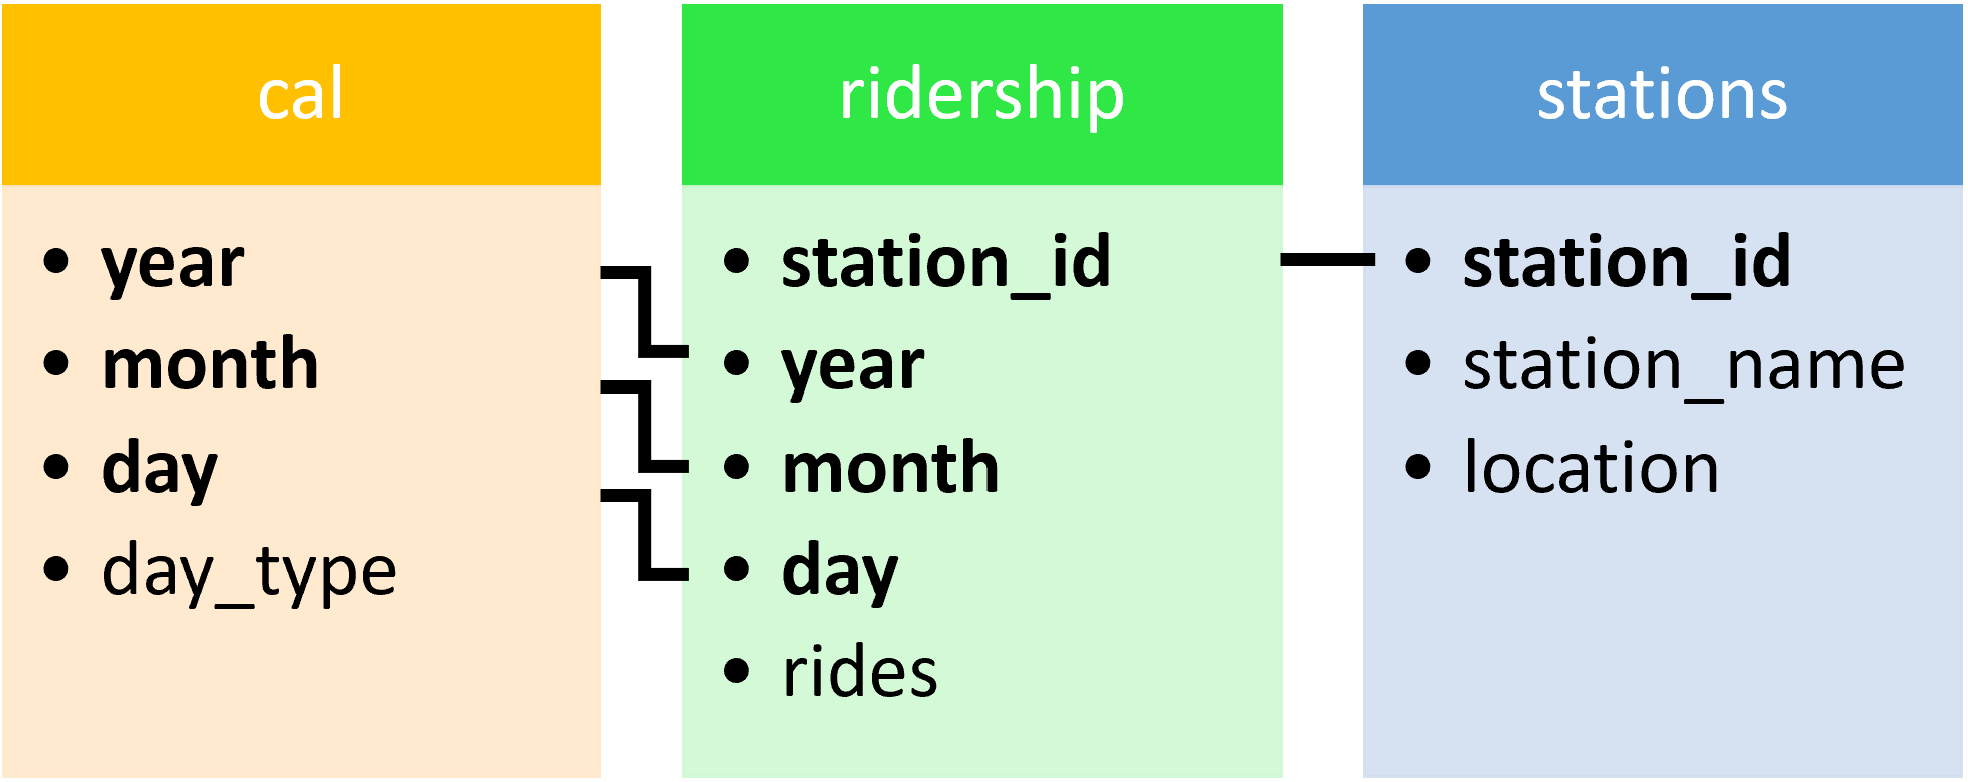

The `cal` table relates to `ridership` via `year`, `month`, and `day`. The `ridership` table relates to the `stations` table via `station_id`.

**Instructions:**
* Merge the `ridership` and `cal` tables together, starting with the `ridership` table on the left and save the result to the variable `ridership_cal`. If you code takes too long to run, your merge conditions might be incorrect.
* Then extend the previous merge to three tables by also merging the `stations` table and assigning the result to `ridership_cal_stations`.
* Create a variable called `filter_criteria` to select the appropriate rows from the merged table so that you can sum the rides column.


In [10]:
#Load data from source dataset files
stations = pd.read_pickle('https://github.com/DataAnalyst21/DatasetsForDataAnalytics/blob/main/stations.p?raw=True')
cal = pd.read_pickle('https://github.com/DataAnalyst21/DatasetsForDataAnalytics/blob/main/cta_calendar.p?raw=True')
ridership = pd.read_pickle('https://github.com/DataAnalyst21/DatasetsForDataAnalytics/blob/main/cta_ridership.p?raw=True')
print(cal.head())
print(ridership.head())


# Merge the ridership and cal tables on year, month, and day
ridership_cal = ridership.merge(cal, on=['year', 'month', 'day'])

# Merge the ridership_cal and stations tables on station_id
ridership_cal_stations = ridership_cal.merge(stations, on='station_id')

# Create a filter to filter ridership_cal_stations
filter_criteria = ((ridership_cal_stations['month'] == 7)  # July
                   & (ridership_cal_stations['day_type'] == 'Weekday')  # Weekdays
                   & (ridership_cal_stations['station_name'] == 'Wilson'))  # Wilson station

# Use .loc and the filter to select for rides
print(ridership_cal_stations.loc[filter_criteria, 'rides'].sum())



   year  month  day        day_type
0  2019      1    1  Sunday/Holiday
1  2019      1    2         Weekday
2  2019      1    3         Weekday
3  2019      1    4         Weekday
4  2019      1    5        Saturday
  station_id  year  month  day  rides
0      40010  2019      1    1    576
1      40010  2019      1    2   1457
2      40010  2019      1    3   1543
3      40010  2019      1    4   1621
4      40010  2019      1    5    719
140005


# **Three table merge**

To solidify the concept of a three DataFrame merge, practice another exercise. A reasonable extension of our review of Chicago business data would include looking at demographics information about the neighborhoods where the businesses are. A table with the median income by zip code has been provided to you. You will merge the `licenses` and `wards` tables with this new income-by-zip-code table called `zip_demo`.

The `licenses` and `wards` are loaded in one of the previous codecells and `zip_demo` DataFrames have been loaded for you in the first line of code in the codecell given below.

**Instructions:**
* Starting with the `licenses` table, merge to it the `zip_demo` table on the `zip` column. Then merge the resulting table to the `wards` table on the `ward` column. Save result of the three merged tables to a variable named `licenses_zip_ward`.
* Group the results of the three merged tables by the column `alderman` and find the median income.


In [12]:
#Load land_use DataFrame from the dataset file
zip_demo = pd.read_pickle("https://github.com/DataAnalyst21/DatasetsForDataAnalytics/blob/main/zip_demo.p?raw=True")


# Merge the licenses table with zip_demo on zip
licenses_zip = licenses.merge(zip_demo, on='zip')

# Merge the resulting table with wards on ward
licenses_zip_ward = licenses_zip.merge(wards, on='ward')

# Print the results by alderman and show median income
print(licenses_zip_ward.groupby('alderman').agg({'income':'median'}))



                             income
alderman                           
Ameya Pawar                 66246.0
Anthony A. Beale            38206.0
Anthony V. Napolitano       82226.0
Ariel E. Reyboras           41307.0
Brendan Reilly             110215.0
Brian Hopkins               87143.0
Carlos Ramirez-Rosa         66246.0
Carrie M. Austin            38206.0
Chris Taliaferro            55566.0
Daniel "Danny" Solis        41226.0
David H. Moore              33304.0
Deborah Mell                66246.0
Debra L. Silverstein        50554.0
Derrick G. Curtis           65770.0
Edward M. Burke             42335.0
Emma M. Mitts               36283.0
George Cardenas             33959.0
Gilbert Villegas            41307.0
Gregory I. Mitchell         24941.0
Harry Osterman              45442.0
Howard B. Brookins, Jr.     33304.0
James Cappleman             79565.0
Jason C. Ervin              41226.0
Joe Moore                   39163.0
John S. Arena               70122.0
Leslie A. Hairston          

# **One-to-many merge with multiple tables**

In this exercise, assume that you are looking to start a business in the city of Chicago. Your perfect idea is to start a company that uses goats to mow the lawn for other businesses. However, you have to choose a location in the city to put your goat farm. You need a location with a great deal of space and relatively few businesses and people around to avoid complaints about the smell. You will need to merge three tables to help you choose your location. The `land_use` table has info on the percentage of vacant land by city ward. The `census` table has population by ward, and the `licenses` table lists businesses by ward.

The `census` and `licenses` tables have been loaded in one of the previous codecells and `land_use` is loaded in the first line of the codecell below.

**Instructions:**
* Merge `land_use` and `census` on the `ward` column. Merge the result of this with `licenses` on the `ward` column, using the suffix `_cen` for the left table and `_lic` for the right table. Save this to the variable `land_cen_lic`.
* Group `land_cen_lic` by `ward`, `pop_2010` (the population in 2010), and `vacant`, then count the number of accounts. Save the results to `pop_vac_lic`.
* Sort `pop_vac_lic` by `vacant`, `account`, and `pop_2010` in descending, ascending, and ascending order respectively. Save it as `sorted_pop_vac_lic`.


In [13]:
#Load land_use DataFrame from the dataset file
land_use = pd.read_pickle("https://github.com/DataAnalyst21/DatasetsForDataAnalytics/blob/main/land_use.p?raw=True")

#Exploring the first rows of the dataframes

print(land_use.head())
print(licenses.head())
print(census.head())

land_cen_lic = land_use.merge(census, on='ward').merge(licenses, on='ward', suffixes=('_cen', '_lic'))

# Group by 'ward', 'pop_2010', and 'vacant', then count the number of 'account' in each group
pop_vac_lic = land_cen_lic.groupby(['ward', 'pop_2010', 'vacant'], as_index=False).agg({'account':'count'})

# Sort pop_vac_lic by 'vacant' in descending order, 'account' in ascending order, and 'pop_2010' in ascending order
sorted_pop_vac_lic = pop_vac_lic.sort_values(['vacant', 'account', 'pop_2010'], ascending=[False, True, True])

# Print the top few rows of sorted_pop_vac_lic
print(sorted_pop_vac_lic.head())




  ward  residential  commercial  industrial  vacant  other
0    1           41           9           2       2     46
1    2           31          11           6       2     50
2    3           20           5           3      13     59
3    4           22          13           0       7     58
4    5           25           3           1       3     68
  account ward  aid                   business               address    zip
0  307071    3  743       REGGIE'S BAR & GRILL       2105 S STATE ST  60616
1      10   10  829                 HONEYBEERS   13200 S HOUSTON AVE  60633
2   10002   14  775                CELINA DELI     5089 S ARCHER AVE  60632
3   10005   12  NaN  KRAFT FOODS NORTH AMERICA        2005 W 43RD ST  60609
4   10044   44  638  NEYBOUR'S TAVERN & GRILLE  3651 N SOUTHPORT AVE  60613
  ward pop_2000 pop_2010 change                                  address  \
0    1    52951    56149     6%              2765 WEST SAINT MARY STREET   
1    2    54361    55805     3%       